## Problem Set 2 (PHYS641)  - Matias Castro Tapia

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

I defined the qrpo routine to do the least squares solution for fit parameters (for polynomial fitting) using the $QR$ decomposition of $A$. Then, if $A=QR$ and we have $A^{T}N^{-1}Am=A^{T}N^{-1}d$:

$$(QR)^{T}N^{-1}(QR)m=(QR)^{T}N^{-1}d$$
$$(R{^T}Q^{T}N^{-1}QR)m=R^{T}Q^{T}N^{-1}d$$
$$m=(R{^T}Q^{T}N^{-1}QR)^{-1}R^{T}Q^{T}N^{-1}d$$
$$m=R^{-1}(Q^{T}N^{-1}Q)^{-1}R^{T,-1}R^{T}Q^{T}N^{-1}d$$
$$m=R^{-1}(Q^{T}N^{-1}Q)^{-1}Q^{T}N^{-1}d$$

For he specific case where $N=I$ we will have:
$$m=R^{-1}(Q^{T}Q)^{-1}Q^{T}N^{-1}d=R^{-1}Q^{T}N^{-1}d$$
since $Q^{T}Q=I$.
My routine considers a general $N$ anyway.

The routine receive $x$ points and data $y=d$, the polynomial order $o$ and, a noise matrix defined as the input $s=N$. The routine print the model paramaters and return the data prediction, i.e, $Am$.

In [2]:
def qrpo(x,y,o,s):
    n=len(y)
    mat=np.zeros([n,o+1]) 
    for i in range(o+1):
        mat[:,i]=x**i
    q,r=np.linalg.qr(mat)
    
    Ninv=np.linalg.inv(s)
    mod=np.linalg.inv(r)@np.linalg.inv(q.T@Ninv@q)@q.T@Ninv@y
    print(mod)
    pred=mat@mod
    return pred
    
    

I also defined the routine atpo for solving the least squares without the $QR$ decomposition. Then, the solution is just $m=(A^{T}N^{-1}A)^{-1}A^{T}N^{-1}d$

In [3]:
def atpo(x,y,o,s):
    n=len(y)
    mat=np.zeros([n,o+1])
    for i in range(o+1):
        mat[:,i]=x**i
 
    Ninv=np.linalg.inv(s)
    mod=np.linalg.inv(mat.T@Ninv@mat)@mat.T@Ninv@y
    print(mod)
    pred=mat@mod
    return pred

Let's do a fit for $f(x)=\sin{x}\cos{x}$.

In [4]:
x=np.linspace(-3,3,301)

In [5]:
y1=np.sin(x)*np.cos(x)

I defined a noise matrix as an identity matrix.

In [6]:
n=len(x)
N=np.zeros([n,n])
for i in range(n):
    N[i][i]=1

A $22^{th}$ order polynomial fit using both methods.

In [7]:
y1predq=qrpo(x,y1,22,N)

[ 4.01940850e-16  1.00000000e+00 -6.18342183e-15 -6.66666667e-01
  2.31498848e-14  1.33333333e-01 -4.33091063e-14 -1.26984121e-02
  3.95100619e-14  7.05466894e-04 -2.18280255e-14 -2.56531355e-05
  7.54691448e-15  6.57711246e-07 -1.64717415e-15 -1.25158437e-08
  2.31504269e-16  1.82533983e-10 -2.02201588e-17 -2.01367224e-12
  1.00572258e-18  1.36829224e-14 -2.14070207e-20]


In [8]:
y1preda=atpo(x,y1,22,N)

[-2.77041326e-04  1.00204414e+00  1.70631879e-04 -6.67263895e-01
 -4.26173355e-05  1.33472485e-01  9.13443838e-06 -1.27162315e-02
 -4.92405347e-06  7.01804660e-04  2.41763747e-06 -2.36882014e-05
 -7.51280407e-07  2.22403810e-07  1.50679239e-07  4.85946147e-08
 -1.95582349e-08 -5.20424665e-09  1.58368688e-09  2.65643865e-10
 -7.26439171e-11 -5.69363998e-12  1.44354489e-12]


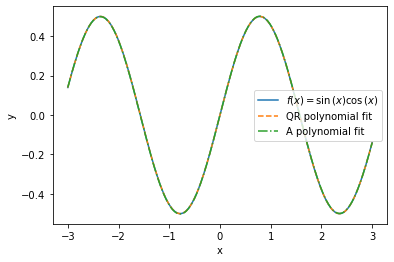

In [9]:
plt.plot(x,y1,label='$f(x)=\sin{(x)} \cos{(x)}$')
plt.plot(x,y1predq,'--',label='QR polynomial fit')
plt.plot(x,y1preda,'-.',label='A polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

It seems like both fits are very close to the function, so let's the absolute error:

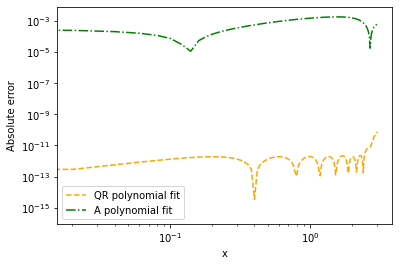

In [10]:
plt.loglog(x,np.abs(y1predq-y1),'--',label='QR polynomial fit',color='orange')
plt.loglog(x,np.abs(y1preda-y1),'-.',label='A polynomial fit',color='green')
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.legend()
plt.show()

Then, the absolute error is much smaller when using the $QR$ decomposition.

## Problem 2

I defined the routine Tn_fit to do a Chebyshev polynomial fit for a set of points $x$, data $y$, and order $od$. I used the Chebyshev polynomial definition $T_{n}=\cos{(n\arccos{(x)})}$ for generating the $n^{th}$ order polynomial. Then, the $i^{th}$ row of the matrix $A$ for the model must be $(T_{0}(x_{i})$ $T_{1}(x_{i})...T_{od}(x_{i}))$ with $x_{i}$ the $i^{th}$ point. To the least squares fit for the coefficients I just used the classic linear solution $m=(A^{T}N^{-1}A)^{-1}A^{T}N^{-1}d=(A^{T}A)^{-1}A^{T}d$ (ignoring the noise matrix) . The routine returns the prediction $Am$ and the set of coefficients $m$. 

In [11]:
def Tn_fit(x,y,od):
    n=len(x)
    mat=np.zeros([n,od+1])
    for i in range(od+1):
        mat[:,i]=np.cos(i*np.arccos(x))
   
    mod=np.linalg.inv(mat.T@mat)@mat.T@y
   
    pred=mat@mod
    return pred,mod

I also defined the routine Tn_eval to eval an array of $x$ points to a model coefficients as:
$$y=m_{0}T_{0}(x)+m_{1}T_{1}(x)+...+m_{od}T_{od}(x)$$

where od=lenght of m.

In [12]:
def Tn_eval(x,m):
    ev=[]
    for i in range(len(m)):
        ev.append(m[i]*np.cos(i*np.arccos(x)))
    return np.array(sum(ev))
        

Let's take the xx array for the fit to $e^{x}$

In [13]:
xx=np.linspace(-1,1,1000)

Just checking that $T_{n}=\cos{(n\arccos{(x)})}$ works and that they are polynomials.

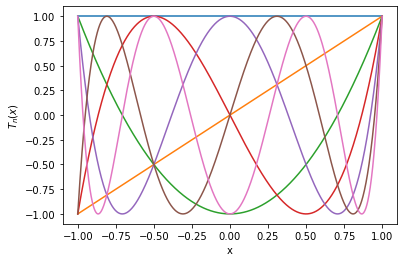

In [14]:
for i in range(7):
    plt.plot(xx,np.cos(i*np.arccos(xx)))
plt.xlabel('x')
plt.ylabel('$T_{n}(x)$')
#plt.legend()
plt.show()

In [15]:
yy=np.exp(xx)

Let's check the stability of the fit.

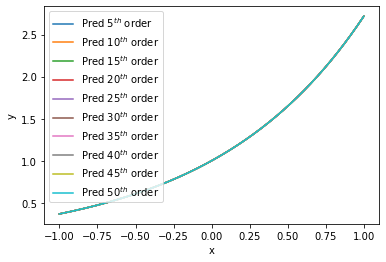

In [16]:
for i in range(5,55,5):
    predt,c=Tn_fit(xx,yy,i)
    plt.plot(xx,predt,label='Pred '+str(i)+'$^{th}$ order')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

It seems like it remains very stable even for a $50^{th}$ order fitting. So, we should look the absolute errors too.

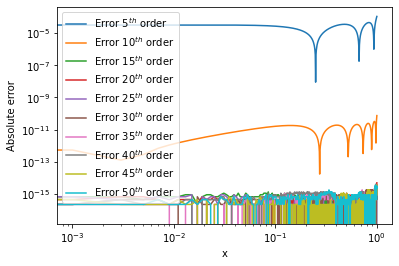

In [17]:
for i in range(5,55,5):
    predt,c=Tn_fit(xx,yy,i)
    plt.loglog(xx,np.abs(yy-predt),label='Error '+str(i)+'$^{th}$ order')
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.legend()
plt.show()

The error remains near $10^{-15}$ from about the $15^{th}$ order. Let's do a $6^{th}$ and a $30^{th}$ order fit for part b).

In [18]:
tn6,c6=Tn_fit(xx,yy,6)
print(c6)

[1.26606584e+00 1.13031696e+00 2.71495266e-01 4.43354952e-02
 5.47415863e-03 5.41243732e-04 4.48739566e-05]


In [19]:
maxe6=np.max(np.abs(tn6-yy))
rms6=np.sqrt(sum(np.abs(tn6-yy)**2)/len(yy))

In [20]:
print('Max error for 6th order: '+str(maxe6))
print('RMS error for 6th order: '+str(rms6)) 

Max error for 6th order: 7.98480781183386e-06
RMS error for 6th order: 1.9852969888235997e-06


In [21]:
tn30,c30=Tn_fit(xx,yy,30)
print(c30)

[ 1.26606588e+00  1.13031821e+00  2.71495340e-01  4.43368498e-02
  5.47424044e-03  5.42926312e-04  4.49773230e-05  3.19843646e-06
  1.99212481e-07  1.10367713e-08  5.50589491e-10  2.49789842e-11
  1.03899528e-12  3.93574062e-14  1.32532874e-15 -1.73472348e-16
 -3.46944695e-18 -1.52655666e-16 -4.16333634e-17 -2.49800181e-16
  1.17961196e-16 -7.63278329e-17 -3.46944695e-18  1.04083409e-16
  4.51028104e-17 -3.81639165e-17  6.59194921e-17 -9.02056208e-17
  1.24900090e-16 -1.42247325e-16  3.29597460e-17]


Now, I have to truncate the $30^{th}$ order fit to $6^{th}$, and evaluate the truncated fit using Tn_eval

In [22]:
c30[7:]=0
print(c30)

[1.26606588e+00 1.13031821e+00 2.71495340e-01 4.43368498e-02
 5.47424044e-03 5.42926312e-04 4.49773230e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [23]:
tn30tr=Tn_eval(xx,c30)

In [24]:
maxe30t=np.max(np.abs(tn30tr-yy))
rms30t=np.sqrt(sum(np.abs(tn30tr-yy)**2)/len(yy))

In [25]:
print('Max error for 30th order truncated fit: '+str(maxe30t))
print('RMS error for 30th order truncated fit: '+str(rms30t)) 

Max error for 30th order truncated fit: 3.4092623653059206e-06
RMS error for 30th order truncated fit: 2.2588113160560264e-06


In [26]:
maxe6/maxe30t,rms6/rms30t

(2.342092498685523, 0.8789122733323323)

If we look the old coefficients of the $30^{th}$ order fit (c30 before truncanting), we can note that the $8^{th}$ coefficient is very similar to the Max error on the truncated $30^{th}$ order fit, both are about $3\times10^{-6}$. 

On the other hand, when comparing the max error for the $6^{th}$ order fit and the truncated $30^{th}$ order, we can see that it was reduced by a factor of $\sim 2.3$ when we truncated, while the RMS error is larger for about $14\%$.

## Problem 3

We can start with the Cholesky decomposition of a noise matrix, then $N=LL^{T}$. If we consider the eigendecomposition of the matrix $N=V\Lambda V^{T}$ and remember that if we know $N=LL^{T}$ and the errors are correlated we can go from correlated data to uncorrelated as follows:
$$d_{uncorr}=L^{-1}d_{corr}$$
Thus, we can consider that $L=V\Lambda^{1/2}$ for positive eigenvalues (because $N$ is a positive defined matrix) based on the two type of decomposition dicussed and we can obtain correlated data from uncorrelated data using the eigenvalues/vectors:
$$d_{corr}=Ld_{uncorr}=V\Lambda^{1/2}d_{uncorr}$$


I defined the routine correlated_data to generate random correlated data from an input of a noise matrix of correlated errors. The routine generates a set of random values (consistent with the length of the noise matrix) and find the eigenvalues/vectors of the noise matrix using numpy.linalg.eig. Then, it generates correlated data using $d_{corr}=V\Lambda^{1/2}d_{uncorr}$ and returns it along with $<d_{corr}d_{corr}^{T}>$. 

$V=[\vec{v_{1}}$ $\vec{v_{2}}...\vec{v_{n}}]$ for $\vec{v_{i}}$ every eigenvector as a column and the element $\Lambda_{ii}=\lambda_{i}$ and $0$ for non-diagonal elements for every eigenvalue $\lambda_{i}$. 

In [27]:
def correlated_data(Ncorr):
    n=len(Ncorr)
    d=np.random.randn(len(Ncorr))
    
    l,vec=np.linalg.eig(Ncorr)

    lam_1=np.zeros([n,n])
    for i in range(n):
        lam_1[i][i]=l[i]

    dcorr=vec@np.sqrt(lam_1)@d
    
    return dcorr,np.transpose([dcorr])@[dcorr]

I created a matrix $N_{ij}=1+\delta_{ij}$ of dimensions $5\times5$

In [28]:
Ncorr=np.ones([5,5])
for i in range(len(Ncorr)):
    Ncorr[i][i]=2

In [29]:
Ncorr

array([[2., 1., 1., 1., 1.],
       [1., 2., 1., 1., 1.],
       [1., 1., 2., 1., 1.],
       [1., 1., 1., 2., 1.],
       [1., 1., 1., 1., 2.]])

I used the routine 100 times to obtain the average of the matrix $<d_{corr}d_{corr}^{T}>$ for these 100 iterations.

In [30]:
dc100=[]
ddt100=[]
for i in range(100):
    dc,ddt=correlated_data(Ncorr)
    dc100.append(dc)
    ddt100.append(ddt)

In [31]:
sum(ddt100)/100

array([[2.72615432, 1.09263198, 1.60634134, 1.3019616 , 1.69560458],
       [1.09263198, 2.57453737, 1.11429005, 1.28721382, 0.95478667],
       [1.60634134, 1.11429005, 2.26958561, 1.4525458 , 1.45165529],
       [1.3019616 , 1.28721382, 1.4525458 , 1.76675411, 1.40441788],
       [1.69560458, 0.95478667, 1.45165529, 1.40441788, 2.12578387]])

Now for 10000 iterations:

In [32]:
dc10000=[]
ddt10000=[]
for i in range(10000):
    dc,ddt=correlated_data(Ncorr)
    dc10000.append(dc)
    ddt10000.append(ddt)

In [33]:
sum(ddt10000)/10000

array([[2.06883928, 0.75486194, 1.08752121, 0.93277717, 1.18082445],
       [0.75486194, 2.37963373, 0.93391176, 1.33569191, 0.68050593],
       [1.08752121, 0.93391176, 1.91416198, 1.11806224, 1.01789104],
       [0.93277717, 1.33569191, 1.11806224, 1.5830557 , 1.0546415 ],
       [1.18082445, 0.68050593, 1.01789104, 1.0546415 , 2.11083216]])

And 100000:

In [34]:
dc100000=[]
ddt100000=[]
for i in range(100000):
    dc,ddt=correlated_data(Ncorr)
    dc100000.append(dc)
    ddt100000.append(ddt)

In [35]:
sum(ddt100000)/100000

array([[2.08437291, 0.75298867, 1.09358325, 0.94062985, 1.1803205 ],
       [0.75298867, 2.36025524, 0.91026667, 1.32259239, 0.67918843],
       [1.09358325, 0.91026667, 1.90795448, 1.11370475, 1.0218473 ],
       [0.94062985, 1.32259239, 1.11370475, 1.59607475, 1.06773362],
       [1.1803205 , 0.67918843, 1.0218473 , 1.06773362, 2.10052975]])

We can note that the average for many realizations $<d_{corr}d_{corr}^{T}>\sim N$ 

## Problem 4

I defined the routine corr_noise to generate the correlated noise matrix $N_{ij}=a \exp(\frac{-(i-j)^{2}}{2\sigma^{2}})+(1-a)\delta_{ij}$ with $a$, $s=\sigma$, and $x$ as inputs. $x$ is just used to now the length of the matrix.

In [36]:
def corr_noise(x,a,s):
    n=len(x)
    N=np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if i==j:
                N[i][j]=a*np.exp(-((i-j)**2)/(2*(s**2)))+(1-a)
            else:
                N[i][j]=a*np.exp(-((i-j)**2)/(2*(s**2)))
    return N

In [37]:
xs=np.linspace(0,999,1000)

I defined the Gaussian signal for the x points.

In [38]:
signal=np.exp(-((xs-xs[499])**2)/(2*(50**2)))

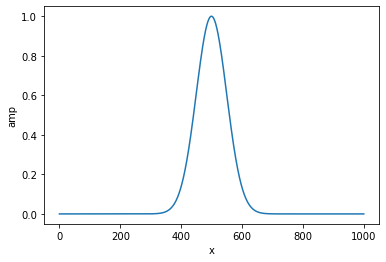

In [39]:
plt.plot(xs,signal)
plt.xlabel('x')
plt.ylabel('amp')
#plt.legend()
plt.show()

I computed the error bar for the fit amplitude for each pair of $a$ and $\sigma$ using the output of the routine corr_noise. The estimation of the error bar is obtained as $\sqrt{(A^{T}N^{-1}A)^{-1}}$, with $A$ the template signal and $N$ the matrix of correlated noise.

In [40]:
a=[0.1,0.5,0.9]
sigma=[5,50,500]
for i in a:
    for j in sigma:
        error=np.sqrt(1/(signal@np.linalg.inv(corr_noise(xs,i,j))@signal))
        print('For a='+str(i)+' and sigma='+str(j)+
             ' the error bar on the fit is:'+str(error))

For a=0.1 and sigma=5 the error bar on the fit is:0.15576335487646098
For a=0.1 and sigma=50 the error bar on the fit is:0.3377448956231588
For a=0.1 and sigma=500 the error bar on the fit is:0.12757498758982014
For a=0.5 and sigma=5 the error bar on the fit is:0.27599935080333926
For a=0.5 and sigma=50 the error bar on the fit is:0.7140544770562327
For a=0.5 and sigma=500 the error bar on the fit is:0.10066392140726646
For a=0.9 and sigma=5 the error bar on the fit is:0.3578952599636376
For a=0.9 and sigma=50 the error bar on the fit is:0.9499319468584407
For a=0.9 and sigma=500 the error bar on the fit is:0.04892549466815368


The best error was for the case of  $a=0.9$ and $\sigma=500$ where the data must be correlated over large distances but almost perfectly correlated; the error bar was 0.0489. The worst case was $a=0.9$ and $\sigma=50$ where the error bar was 0.9499, in this case $a$ and $\sigma$ are very closed to the amplitude and $\sigma_{src}$ values, then probably when stimating $\sqrt{(A^{T}N^{-1}A)^{-1}}$, the coupling of the source signal and the errors could cause that the error bars will be of the order of the amplitude. The second worst was $a=0.5$ and $\sigma=50$ where the error bar was 0.714, that also has $\sigma=\sigma_{src}$.